In [2]:
%matplotlib inline

from fastai.data.all import *
from fastai.vision.all import *

from os import listdir
from os.path import isfile, join

<B>Library for create Accuracy/Error graph

In [2]:
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

# 1) Prepare Input Data

In [3]:
path = 'data/car_data/'
data = ImageDataLoaders.from_folder(path, train='train', valid='val', item_tfms=Resize(224), bs=4, shuffle_train=True, num_workers=0)

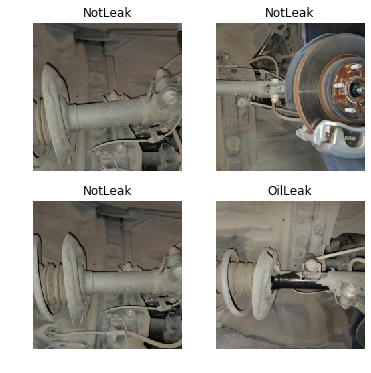

In [4]:
data.show_batch()

# 2) Model Creation&Calibration

In [5]:
learner = cnn_learner(data, resnet34, metrics=[accuracy,error_rate])

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=9.12010818865383e-07)

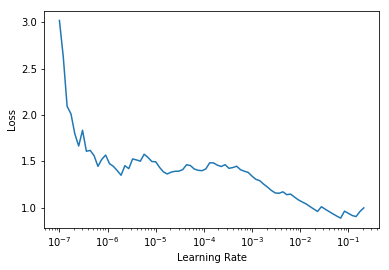

In [6]:
# Investigate for appropriate Learning rate
learner.lr_find()

<B>Set Learning rate at maximum curve and Low Loss = 1e-3 to 3e-3

In [7]:
learner.fit_one_cycle(3, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.593575,0.034827,0.986667,0.013333,02:37
1,0.353981,0.007259,1.000000,0.000000,02:41
2,0.294190,0.007060,1.000000,0.000000,02:48


# 3) Visualize accuracy result

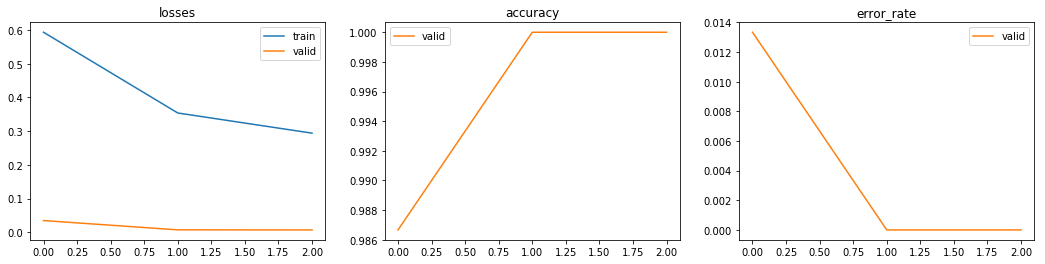

In [8]:
learner.recorder.plot_metrics()

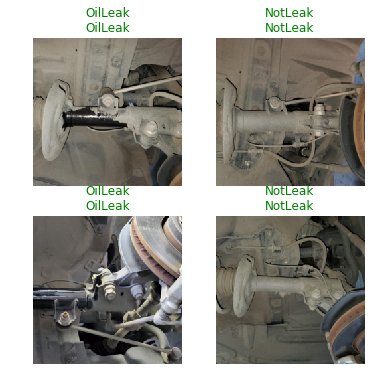

In [9]:
learner.show_results()

<B>Case1: Trial on Multiple image

In [4]:
mypath = './TestImg/'
OK_counter = 0
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for img_name in onlyfiles:

    img = plt.imread(mypath + img_name)
    img_catalog = img_name.split('_')[0]
    # Get prediction
    pred_class,pred_idx, outputs  = learner.predict(img)
    
    if img_catalog == pred_class or ((img_catalog == 'Leak') and (pred_class == 'OilLeak')):
        OK_counter+= 1
    print("File:", img_name)
    print(pred_class)

print('Accuracy = ' + str(OK_counter/len(onlyfiles)*100) )

File: NotLeak_original_CHR_R5_WS_MAC_FL_V1.jpg_2065ebd9-ef65-4162-9f1a-7a57d9f65a1a.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FL_V1.jpg_45a085be-7b13-4e12-bae8-52cdc54276e8.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FL_V2.jpg_225f81e0-a544-4243-98ef-1eb916760800.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FL_V3.jpg_05c1d71f-af42-471e-850b-0bb8bac79a54.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FL_V3.jpg_19889be1-fc70-4faf-ab2a-eaba542a41f5.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FL_V3.jpg_784daa72-4e60-4a12-b8bf-c9ba73ee87d2.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FR_V2.jpg_32a7d1b9-f5c7-45e2-af9a-bacf029e6490.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FR_V2.jpg_8acba2fb-4825-4a4a-8d75-8c9ab4ae04ba.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FR_V2.jpg_d1913304-41e2-4b6e-bb74-22e448d7b34a.jpg
NotLeak


File: NotLeak_original_CHR_R5_WS_MAC_FR_V3.jpg_fe052937-d365-4ddf-8aac-9f819d0332a2.jpg
NotLeak


File: OilLeak_original_CHR_R1_WS_MAC_FL_V1.jpg_50587629-807c-4d56-83c0-254cabee6486.jpg
OilLeak


File: OilLeak_original_CHR_R1_WS_MAC_FL_V3.jpg_9a65fd56-2111-40b9-9010-bdd3c559bb82.jpg
OilLeak


File: OilLeak_original_CHR_R1_WS_MAC_FL_V3.jpg_bc727eb0-5190-4156-8d6c-b4704972e245.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FL_V2.jpg_59fb9c03-936f-4e40-a3ff-83ff91b7d3ad.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FL_V2.jpg_8b377847-dd76-43d4-a2cf-88cf6ba758e4.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V1.jpg_24550007-73c9-4c80-9bdb-00bbc10249a9.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V1.jpg_73e86b6c-d94a-410b-be0b-0e75dd902635.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V1.jpg_ee524ad9-a86e-426e-8869-eda25129b7f1.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V1.jpg_f7abf8eb-e157-4eaf-90a7-b9bbe3ecb816.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V2.jpg_f3eb252c-6d51-4a3b-a93b-fb5eff045c3d.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V3.jpg_23355ae0-2bda-4a23-af4d-1de4fd8c84fa.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V3.jpg_63b2a17d-2bee-4ecb-b66e-27a4f07a446b.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V3.jpg_a11b3360-ddbf-4c66-938d-06aaef9a5213.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V3.jpg_a5daf36e-ac36-4e99-9a7d-0346c29a0701.jpg
OilLeak


File: OilLeak_original_CHR_R2_WS_MAC_FR_V3.jpg_ff11a79e-1444-4e7c-b5b4-9803d50ad0b5.jpg
OilLeak
Accuracy = 100.0


<B>Case2: Trial on sample image 

In [ ]:
# Trial on single image
mypath_otherview = './TestImg_otherView/'

img_list = ['CHR_R1_WO_DOU_RL_V1.jpg', 'CHR_R5_WO_DOU_RL_V1.jpg'] 
for img_name in img_list:

    img = plt.imread(join(mypath_otherview, img_name))
    
    # Get prediction
    pred_class = learner.predict(img)
    print("File:", img_name)
    print(pred_class)
    print()

<B> Save Calibrate model for external use<BR>

In [11]:
learner.export("FinalMDL_v2.pth")

# 4) Deploy Model

In [3]:
# Load MDL
Model_name = 'FinalMDL_v2.pth'
learner = load_learner(Model_name)

In [12]:
import os
from os.path import isfile, join
from tkinter.filedialog import askopenfilename

# file explorer window 
def browseFiles(): 
    
    # Get current working directory
    curr_directory = os.getcwd() # will get current working directory
    # Join current path with subfolder
    merge_path = join(curr_directory, './DemoImg')
    # Normalize to absolute path
    merge_path = os.path.abspath(merge_path)
    # Set dialog box
    filename = askopenfilename(initialdir = merge_path, 
                               title = "Select a File" )   
    if not filename:
        return
    Path_textBox.delete(1.0, tk.END)
    # Change label contents 
    Path_textBox.insert(tk.END, filename)

In [13]:
from PIL import Image, ImageTk
from tkinter import font

def updateImage(): 
    
    #Get Image
    img_path = Path_textBox.get("1.0", "end-1c")  
    
    # Check result OK/NG
    judge_status = judge_result(img_path)
    flag_color  = "red" if judge_status == "OilLeak" else "light green"
    
    # Roate and Resize image
    image = Image.open(img_path)
    #image = image.rotate(270).resize((400, 400), Image.ANTIALIAS)
    image = image.rotate(270).resize((400, 400))

    # Display image
    tk_image = ImageTk.PhotoImage(image)
    
    # control underline of judge_status
    f = font.Font(Judge_label, Judge_label.cget("font"))
    f.configure(underline=True)

    Judge_label.configure(image=tk_image, font=f, text=judge_status, fg=flag_color)
    Judge_label.image = tk_image # keep a reference!
    

In [14]:
def judge_result(img_path):

    # Get Image and Judge result
    img = plt.imread(img_path)
    pred_class,pred_idx, outputs  = learner.predict(img)
    
    return "OilLeak" if pred_class == "OilLeak" else "NotLeak"

In [17]:
import tkinter as tk

from fastai.data.all import *
from fastai.vision.all import *

# Load MDL
Model_name = 'FinalMDL_v2.pth'
learner = load_learner(Model_name)
    

# Create GUI
window = tk.Tk()
window.title("Oil Leak Judgement")

# Define size
window.columnconfigure(0, minsize=100)
window.rowconfigure([0, 1], minsize=2)

# Define GUI Area
Browse_frame = tk.Frame(window, relief=tk.RAISED)
Judge_frame = tk.Frame(window, relief=tk.RAISED, bd=2)
Result_frame = tk.Frame(window, relief=tk.RAISED, bd=2)

# Define button & TextArea
Path_textBox = tk.Text(Browse_frame, height=2, width=90)
btn_open = tk.Button(Browse_frame, text="Open", command=browseFiles)
btn_exec = tk.Button(Judge_frame, text="Judge", command=updateImage)
Judge_label = tk.Label(Result_frame, compound='center', font=("Helvetica", 40))

# Set Position of Button & TextArea
Path_textBox.grid(row=0, column=0, sticky="nsew", padx=5, pady=5)
btn_open.grid(row=0, column=1, sticky="ew", padx=5, pady=5)
btn_exec.grid(row=0, column=0, pady=5)
Judge_label.grid(row=0, column=0,padx=5, pady=5)

# Align button to Center
btn_exec.pack(side="top")
Judge_label.pack(side="top")

# Set Position of GUI Area
Browse_frame.grid(row=0, column=0, sticky="ns")
Judge_frame.grid(row=1, column=0, sticky="nsew")
Result_frame.grid(row=2, column=0, sticky="nsew")


window.mainloop()